In [18]:
import xarray as xr
import pandas as pd
import copernicusmarine as cm
from pathlib import Path

from tqdm.notebook import tqdm

In [21]:
PATH_RAW = Path('../../data/raw/mediterranean_2024/')
PATH_RAW.mkdir(parents=True, exist_ok=True)

In [2]:
ds = cm.open_dataset(dataset_id = 'cmems_obs-oc_med_bgc-reflectance_nrt_l3-multi-1km_P1D')


# Caution! If using this product of Copernicus, take into account that we will download every month and compute the mean, which means ~200Gb per month
# ds = cm.open_dataset(dataset_id = 'cmems_obs-oc_med_bgc-reflectance_nrt_l3-olci-300m_P1D')


INFO - 2025-04-16T19:39:18Z - Dataset version was not specified, the latest one was selected: "202207"
INFO - 2025-04-16T19:39:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-16T19:39:30Z - Service was not specified, the default one was selected: "arco-geo-series"


In [14]:
ds['RRS412']

<xarray.DataArray 'RRS412' (time: 718, latitude: 1580, longitude: 3308)>
[3752727520 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 30.01 30.02 30.03 30.04 ... 45.97 45.98 45.99
  * longitude  (longitude) float32 -5.994 -5.981 -5.968 ... 36.47 36.48 36.49
  * time       (time) datetime64[ns] 2023-04-29 2023-04-30 ... 2025-04-15
Attributes:
    long_name:      Multi-sensor Remote Sensing Reflectance at 412nm
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    type:           surface
    units:          sr^-1
    valid_max:      1.0
    valid_min:      9.999999974752427e-07

In [4]:
times = ds.time.values
years = pd.DatetimeIndex(times).year
limited_year = years == 2024
ds_sub = ds.sel(time=limited_year)
ds_sub

<xarray.Dataset>
Dimensions:     (time: 366, latitude: 1580, longitude: 3308)
Coordinates:
  * latitude    (latitude) float32 30.01 30.02 30.03 30.04 ... 45.97 45.98 45.99
  * longitude   (longitude) float32 -5.994 -5.981 -5.968 ... 36.47 36.48 36.49
  * time        (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
Data variables: (12/13)
    QI_RRS412   (time, latitude, longitude) float32 ...
    QI_RRS443   (time, latitude, longitude) float32 ...
    QI_RRS490   (time, latitude, longitude) float32 ...
    QI_RRS510   (time, latitude, longitude) float32 ...
    QI_RRS555   (time, latitude, longitude) float32 ...
    QI_RRS670   (time, latitude, longitude) float32 ...
    ...          ...
    RRS443      (time, latitude, longitude) float32 ...
    RRS490      (time, latitude, longitude) float32 ...
    RRS510      (time, latitude, longitude) float32 ...
    RRS555      (time, latitude, longitude) float32 ...
    RRS670      (time, latitude, longitude) float32 ...
    SENSORMASK  (time, latitude, longitude) float64 ...
Attributes: (12/37)
    Conventions:             CF-1.4
    citation:                 
    cmems_product_id:        OCEANCOLOUR_MED_BGC_L3_NRT_009_141
    cmems_production_unit:   OC-CNR-ROMA-IT
    comment:                 
    contact:                 technical@gos.artov.isac.cnr.it
    ...                      ...
    start_date:              2023-04-29
    start_time:              08:00:00 UTC
    stop_date:               2023-04-29
    stop_time:               14:00:00 UTC
    title:                   cmems_obs-oc_med_bgc-reflectance_nrt_l3-multi-1k...
    westernmost_longitude:   -6.0

In [5]:
# Highly Time and RAM memory consuming (depending on the copernicus product)
ds_monthly_avg = ds_sub.groupby('time.month').mean(dim='time')

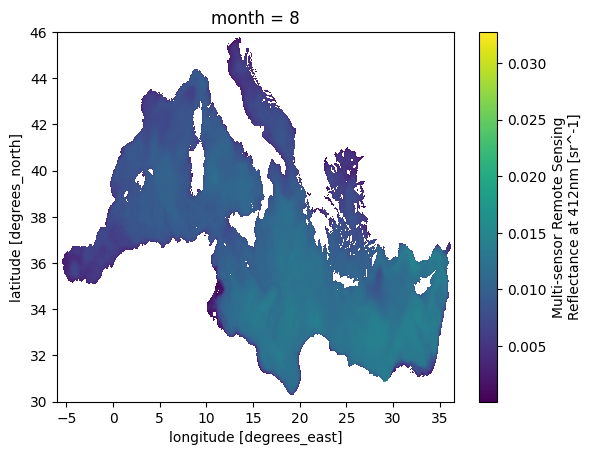

In [11]:
ds_monthly_avg['RRS412'].sel(month=8).plot()

In [15]:
# ds_monthly_avg = []
# for m in tqdm(ds_sub.groupby('time.month')):
#     ds_monthly_avg.append(m[1].mean(dim='time'))

In [22]:

path_save = PATH_RAW / 'monthly_avg' 
ds_monthly_avg.to_netcdf(f'{path_save}.nc')